# <div style = 'background-color:skyblue'> <center> 1st_Mini_Project_Regressor </div>

# Problem Statement

__The success of any retail store depends upon its sales. More the sales made, more is the revenue.To enable this, store owners rely heavily on past data to predict future sales. This will help them in strategizing their business models and come up with innovative techniques and ideas to attract customers and set realistic goals.__

__So for this sales stores need a model for sales prediction which will help them in improving the sales__

## Import The Important libraries --

In [1]:
import numpy as np                                     # Used for Mathematical calculations
import pandas as pd                                    # Used for dealing with DataFrame 
import matplotlib.pyplot as plt                        # Used for data Visualization
import seaborn as sb                                   # Used for Advanced Data Visualization
from tabulate import tabulate                          # Used for create tables 
import warnings                                        # Used for ignore Warnings 
warnings.filterwarnings("ignore")
                                                   
from sklearn import preprocessing                      # Used for preprocessing        

from sklearn.preprocessing import MinMaxScaler         # Used for Scaling the data 
from sklearn.model_selection import train_test_split   # Used for spliting the dataset into Training and testing
from sklearn.model_selection import cross_val_score    # Used for Cross validation

from sklearn.linear_model import LinearRegression      # used for Linear regression model Building
from sklearn.tree import DecisionTreeRegressor         # used for Decisiion Tree Regressor model Building
from sklearn.ensemble import RandomForestRegressor     # Used for Random Forest Regressor model Building

from sklearn.metrics import mean_squared_error         # Used for Calculate Mean Squared Error
from sklearn.metrics import mean_absolute_error        # Used for Calculate Mean Absolute Error




### <font color=Green> ---------------------------------------------------------------------------------------------------------------------------------------------------------------

## Reading The dataset --

In [2]:
df=pd.read_csv("DS3_C6_S1_Regression_StoreSales_Data_Project.csv")
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.074402,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.064299,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN
14200,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN
14201,NCO17,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,Small,Tier 2,Supermarket Type1,NaN
14202,FDJ26,15.30,Regular,0.064709,Canned,214.6218,OUT017,2007,Small,Tier 2,Supermarket Type1,NaN


## Preprocessing --

In [3]:
df.shape                                               # Check the Structure of the data 

(14204, 12)

In [4]:
df.columns                                             # Check the Column names in the dataframe 

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [5]:
df.dtypes                                              # Check the data types features

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [6]:
cat=df.select_dtypes(include="object")                 #  Tacking only categorical columns 
num=df.select_dtypes(exclude="object")                 # tacking only numerical columns 

In [7]:
a=list(cat.columns)                                    # Creating List of the categorical columns
b=list(num.columns)                                    # Creating list of the numerical columns 

#### Tabular format of Categorical and numerical Features

In [8]:
print(tabulate({"categorical":a,"numerical":b},headers=["Categorical","Numerical"]))

Categorical           Numerical
--------------------  -------------------------
Item_Identifier       Item_Weight
Item_Fat_Content      Item_Visibility
Item_Type             Item_MRP
Outlet_Identifier     Outlet_Establishment_Year
Outlet_Size           Item_Outlet_Sales
Outlet_Location_Type
Outlet_Type


In [9]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,14204.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.793380,0.070301,141.004977,1997.830681,2181.288914
std,4.651716,0.048621,62.086938,8.371664,1706.499616
min,4.555000,0.003575,31.290000,1985.000000,33.290000
25%,8.710000,0.033143,94.012000,1987.000000,834.247400
50%,12.600000,0.062347,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [10]:
for i in df.columns:                                   # Finding all unique values in each Features and their Counts 
    print(i)
    print(df[i].value_counts())

Item_Identifier
FDU15    10
FDS25    10
FDA38    10
FDW03    10
FDJ10    10
         ..
FDR51     7
FDM52     7
DRN11     7
FDH58     7
NCW54     7
Name: Item_Identifier, Length: 1559, dtype: int64
Item_Weight
17.600    163
12.150    154
10.500    147
15.100    137
13.650    136
         ... 
7.640       8
5.210       8
9.035       7
4.615       7
7.850       7
Name: Item_Weight, Length: 415, dtype: int64
Item_Fat_Content
Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64
Item_Visibility
0.064709    269
0.074402    252
0.082291    148
0.063595    112
0.064299     98
           ... 
0.162572      1
0.014826      1
0.058034      1
0.043786      1
0.104720      1
Name: Item_Visibility, Length: 13010, dtype: int64
Item_Type
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat        

In [11]:
df.isnull().sum()                                      # Check for null values

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

### <font color=crimson > There is too many null values in this dataset that is more that 35% so here we can drop these values also but dropping is not a good apprach so here we do a group by with respect to Outlet Types and insert a mean value In sales according to Outlet types.

## Null values Treatment---

In [12]:
df.groupby(by="Outlet_Type")["Item_Outlet_Sales"].mean()       # grouping with aggrigation function mean

Outlet_Type
Grocery Store         339.828500
Supermarket Type1    2316.181148
Supermarket Type2    1995.498739
Supermarket Type3    3694.038558
Name: Item_Outlet_Sales, dtype: float64

In [13]:
df["Item_Outlet_Sales"]=df["Item_Outlet_Sales"].replace([np.nan],"Unknown")    # replace NaN value with String Type Unknown

In [14]:
df.loc[((df["Outlet_Type"]=="Grocery Store") & (df.Item_Outlet_Sales == "Unknown")) ,"Item_Outlet_Sales"]=339.828500
df.loc[((df["Outlet_Type"]=="Supermarket Type1") & (df.Item_Outlet_Sales == "Unknown")) ,"Item_Outlet_Sales"]=2316.181148
df.loc[((df["Outlet_Type"]=="Supermarket Type2") & (df.Item_Outlet_Sales == "Unknown")) ,"Item_Outlet_Sales"]=1995.498739
df.loc[((df["Outlet_Type"]=="Supermarket Type3") & (df.Item_Outlet_Sales == "Unknown")) ,"Item_Outlet_Sales"]=3694.038558

In [15]:
df["Item_Outlet_Sales"] = df["Item_Outlet_Sales"].astype(float) # Again Converting object datatype Featur into float 

In [16]:
df.isnull().sum()                                      # Again Checking for Null values 

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [17]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138000
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.422800
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.270000
3,FDX07,19.20,Regular,0.074402,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.380000
4,NCD19,8.93,Low Fat,0.064299,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.705200
...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,2316.181148
14200,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,1995.498739
14201,NCO17,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,Small,Tier 2,Supermarket Type1,2316.181148
14202,FDJ26,15.30,Regular,0.064709,Canned,214.6218,OUT017,2007,Small,Tier 2,Supermarket Type1,2316.181148


### <font color=crimson > Now There is no null values present in this dataset .

## Data Vizualization --

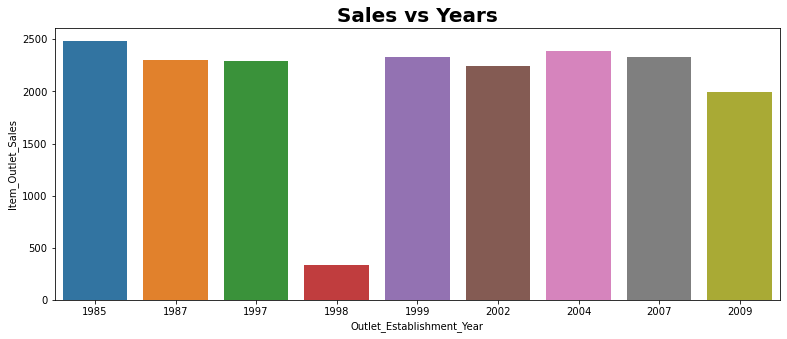

In [18]:
plt.figure(figsize=(13,5))
plt.title("Sales vs Years",fontsize=20,fontweight="bold")
sb.barplot(x=df["Outlet_Establishment_Year"],y=df["Item_Outlet_Sales"],ci=None,)
plt.show()

### <font color=dark><u>INTERPRETATION :
    
### <font color=magneta > In Year 1985 the Sales is more i.e 2400 But in 1998 the sales is gone down too much i.e 250.


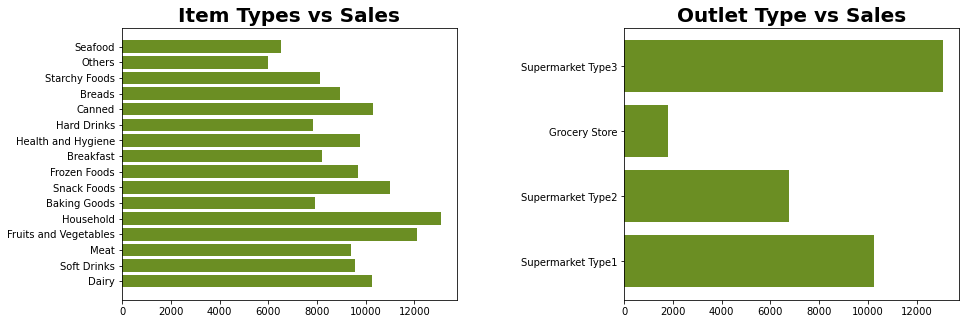

In [19]:
plt.figure(figsize =(15, 5))
plt.subplots_adjust(wspace=0.5)
plt.subplot(1,2,1)
plt.title("Item Types vs Sales",fontsize=20,fontweight="bold")
plt.barh(df.Item_Type,df.Item_Outlet_Sales,color="olivedrab")

plt.subplot(1,2,2)
plt.title("Outlet Type vs Sales",fontsize=20,fontweight="bold")
plt.barh(df.Outlet_Type,df.Item_Outlet_Sales,color="olivedrab")

plt.show()

### <font color=dark><u>INTERPRETATION :
    
### <font color=magneta > In Year 1985 the Sales is more i.e 2400 But in 1998 the sales is gone down too much i.e 250.

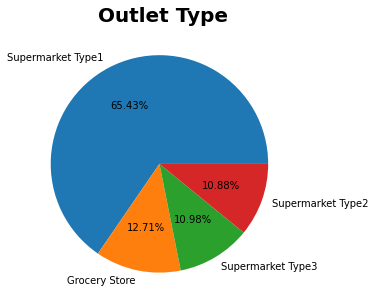

In [20]:
plt.figure(figsize =(15, 5))
plt.title(" Outlet Type",fontsize=20,fontweight="bold")
percentage = df["Outlet_Type"].value_counts()
labels = list(df["Outlet_Type"].value_counts().index)
plt.pie(percentage,labels = labels, autopct= "%0.2f%%")

plt.show()

### <font color=dark><u>INTERPRETATION :
    
### <font color=magneta > *In Store The Quantity of Fruits and Vegitable type is more in the superstore and the Quantity of Seafood is less from others in the Superstore.
### <font color=magneta > *In Supermarket the Maximum no of items is from Supermarket Type 1 that is approx 65 % and minimum no of prodects is from Supermarket Type 2.

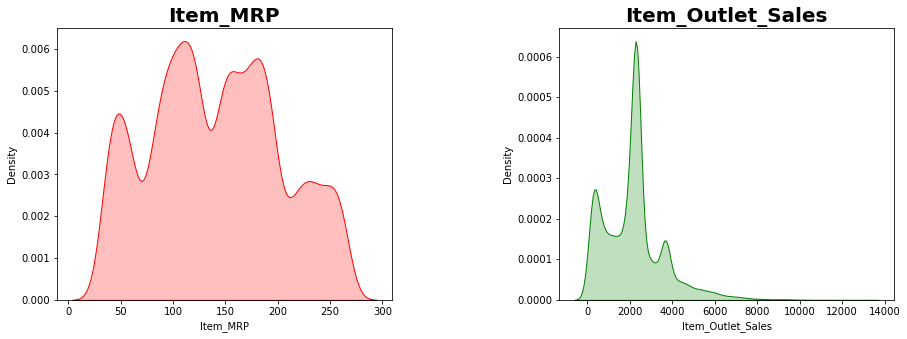

In [21]:
plt.figure(figsize =(15, 5))
plt.subplots_adjust(wspace=0.5)
plt.subplot(1,2,1)
plt.title("Item_MRP",fontsize=20,fontweight="bold")
sb.kdeplot(x=df["Item_MRP"],shade=True,color = "red")

plt.subplot(1,2,2)
plt.title("Item_Outlet_Sales",fontsize=20,fontweight="bold")
sb.kdeplot(x=df["Item_Outlet_Sales"],shade=True,color = "Green")

plt.show()

### <font color=dark>INTERPRETATION :
    
### <font color=magneta >* The MRP of the items which is in the Superstore is from 1 to 300 and Max no of the products is nearly 100.
### <font color=magneta >* The Sales distribution is from 0 to 14000 the most of the sales is in left side that is from 0 to 6000 so we can say that the data is right squed.

In [22]:
object_column=df.select_dtypes(include=object)
object_column

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,Medium,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1
...,...,...,...,...,...,...,...
14199,FDB58,Regular,Snack Foods,OUT046,Small,Tier 1,Supermarket Type1
14200,FDD47,Regular,Starchy Foods,OUT018,Medium,Tier 3,Supermarket Type2
14201,NCO17,Low Fat,Health and Hygiene,OUT045,Small,Tier 2,Supermarket Type1
14202,FDJ26,Regular,Canned,OUT017,Small,Tier 2,Supermarket Type1


In [23]:
for col in object_column.columns:                      # Convert Object Features ino Categorical DataType
    df[col]=df[col].astype("category")

In [24]:
df.dtypes                                              # Checking DataTypes

Item_Identifier              category
Item_Weight                   float64
Item_Fat_Content             category
Item_Visibility               float64
Item_Type                    category
Item_MRP                      float64
Outlet_Identifier            category
Outlet_Establishment_Year       int64
Outlet_Size                  category
Outlet_Location_Type         category
Outlet_Type                  category
Item_Outlet_Sales             float64
dtype: object

## Label Encoding --

In [25]:
label_encoder=preprocessing.LabelEncoder()
for col in object_column.columns:                      # Doing Label Encoding of all the Object Features And convert it into a numerical 
    df[col]=label_encoder.fit_transform(df[col])

In [26]:
df                                                     

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.138000
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.422800
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.270000
3,1121,19.20,1,0.074402,6,182.0950,0,1998,1,2,0,732.380000
4,1297,8.93,0,0.064299,9,53.8614,1,1987,0,2,1,994.705200
...,...,...,...,...,...,...,...,...,...,...,...,...
14199,233,10.50,1,0.013496,13,141.3154,8,1997,2,0,1,2316.181148
14200,308,7.60,1,0.142991,15,169.1448,3,2009,1,2,2,1995.498739
14201,1426,10.00,0,0.073529,8,118.7440,7,2002,2,1,1,2316.181148
14202,521,15.30,1,0.064709,3,214.6218,2,2007,2,1,1,2316.181148


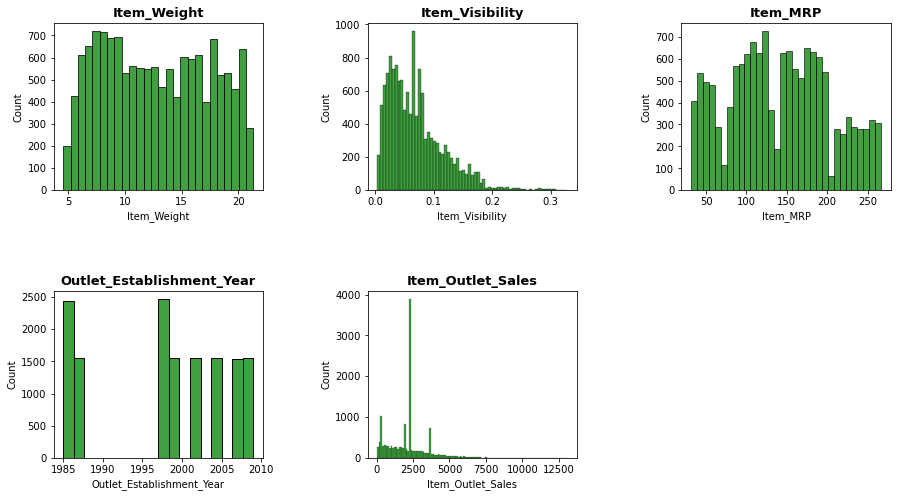

In [27]:
plt.figure(figsize =(15, 8))                           # Set Figure Sizes 
plt.subplots_adjust(wspace=0.5)                        # Adjust Spacing between the graphs 
plt.subplots_adjust(hspace=0.6)                        # Adject spacing between the two graphs 
plt.subplot(2,3,1)                                     # ploting subplots 
plt.title("Item_Weight",fontsize=13,fontweight="bold") # Set title
sb.histplot(df["Item_Weight"],color="green")           # Creating histplot 

plt.subplot(2,3,2)
plt.title("Item_Visibility",fontsize=13,fontweight="bold")
sb.histplot(df["Item_Visibility"],color="green")

plt.subplot(2,3,3)
plt.title("Item_MRP",fontsize=13,fontweight="bold")
sb.histplot(df["Item_MRP"],color="green")

plt.subplot(2,3,4)
plt.title("Outlet_Establishment_Year",fontsize=13,fontweight="bold")
sb.histplot(df["Outlet_Establishment_Year"],color="green")

plt.subplot(2,3,5)
plt.title("Item_Outlet_Sales",fontsize=13,fontweight="bold")
sb.histplot(df["Item_Outlet_Sales"],color="green")

plt.show()

## Checking Correlation --

In [28]:
correlation=df.corr()                                  # Finding correlation as a DataFrame 
correlation

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,1.000000,0.050768,-0.111079,-0.040769,-0.012048,0.010743,-0.001089,-0.002954,0.002209,-0.002473,-0.004532,0.001873
Item_Weight,0.050768,1.000000,-0.033737,-0.020472,0.031884,0.035751,0.003002,0.000247,0.000944,-0.001719,0.001913,0.012133
Item_Fat_Content,-0.111079,-0.033737,1.000000,0.048315,-0.147733,-0.004019,-0.001095,0.000137,-0.000827,0.001373,-0.000228,0.012248
Item_Visibility,-0.040769,-0.020472,0.048315,1.000000,-0.037821,-0.009144,-0.108731,-0.090833,0.026808,-0.020550,-0.172744,-0.155082
Item_Type,-0.012048,0.031884,-0.147733,-0.037821,1.000000,0.043948,0.001126,0.003061,-0.001080,0.002083,0.004305,0.014660
Item_MRP,0.010743,0.035751,-0.004019,-0.009144,0.043948,1.000000,-0.000555,0.000141,-0.001305,0.000838,0.000136,0.409811
Outlet_Identifier,-0.001089,0.003002,-0.001095,-0.108731,0.001126,-0.000555,1.000000,0.079047,0.423623,-0.716151,0.099899,0.195838
Outlet_Establishment_Year,-0.002954,0.000247,0.000137,-0.090833,0.003061,0.000141,0.079047,1.000000,0.428387,-0.089328,-0.122519,-0.061599
Outlet_Size,0.002209,0.000944,-0.000827,0.026808,-0.001080,-0.001305,0.423623,0.428387,1.000000,-0.590677,-0.260496,-0.072699
Outlet_Location_Type,-0.002473,-0.001719,0.001373,-0.020550,0.002083,0.000838,-0.716151,-0.089328,-0.590677,1.000000,0.467251,0.107630


## Heatmap--

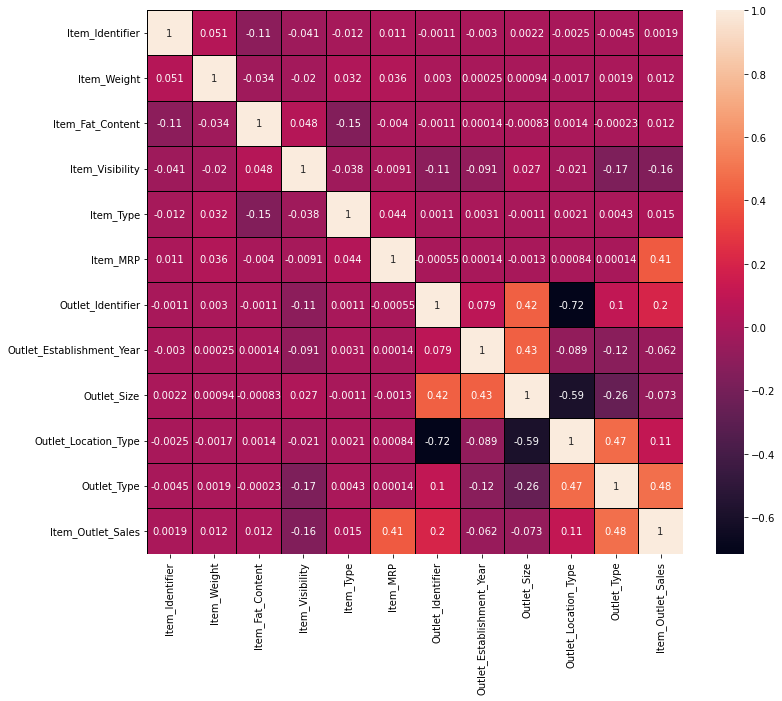

In [29]:
plt.figure(figsize=(12,10))                            # Setting figure size of heatmap
sb.heatmap(df.corr(),annot=True,fmt='.2g',linewidths=1,linecolor='Black')               # Ploting heatmap correlation 
plt.show()

In [30]:
abs(correlation["Item_Outlet_Sales"]).sort_values(ascending=False)

Item_Outlet_Sales            1.000000
Outlet_Type                  0.481410
Item_MRP                     0.409811
Outlet_Identifier            0.195838
Item_Visibility              0.155082
Outlet_Location_Type         0.107630
Outlet_Size                  0.072699
Outlet_Establishment_Year    0.061599
Item_Type                    0.014660
Item_Fat_Content             0.012248
Item_Weight                  0.012133
Item_Identifier              0.001873
Name: Item_Outlet_Sales, dtype: float64

### <font color=dark>INTERPRETATION :
### <font color=magneta > Here we consider only top highly correlated Features .
### <font color=magneta > Outlet_Identifier, Outlet_Type, Item_MRP, Item_Outlet_Sales, Outlet_Location_Type, Item_Visibility.


In [31]:
col=["Item_Visibility","Item_MRP","Outlet_Identifier","Outlet_Location_Type","Outlet_Type"]

## Data Scaling Through MinMax Scaler --

In [32]:
df_scaled=pd.DataFrame(MinMaxScaler().fit_transform(df[col].to_numpy()),columns=col) # Scale the Data Through MinmAx Scaler 
df_scaled

,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Location_Type,Outlet_Type
0,0.038399,0.927507,1.000000,0.0,0.333333
1,0.048346,0.072068,0.333333,1.0,0.666667
2,0.040593,0.468288,1.000000,0.0,0.333333
3,0.218055,0.640093,0.000000,1.0,0.000000
4,0.186950,0.095805,0.111111,1.0,0.333333
...,...,...,...,...,...
14199,0.030546,0.467004,0.888889,0.0,0.333333
14200,0.429216,0.585126,0.333333,1.0,0.666667
14201,0.215364,0.371199,0.777778,0.5,0.333333
14202,0.188211,0.778154,0.222222,0.5,0.333333


## Train test Spliting --

In [33]:
x=(df_scaled).values                                   # Put all Independent features into the x variable 
y=df[["Item_Outlet_Sales"]].values                     # Put Target column into the y Variable 

In [34]:
x                                                     

array([[0.03839895, 0.92750715, 1.        , 0.        , 0.33333333],
       [0.04834585, 0.0720684 , 0.33333333, 1.        , 0.66666667],
       [0.04059334, 0.46828841, 1.        , 0.        , 0.33333333],
       ...,
       [0.21536442, 0.37119946, 0.77777778, 0.5       , 0.33333333],
       [0.18821143, 0.77815384, 0.22222222, 0.5       , 0.33333333],
       [0.31139284, 0.20588425, 0.77777778, 0.5       , 0.33333333]])

In [35]:
y

array([[3735.138   ],
       [ 443.4228  ],
       [2097.27    ],
       ...,
       [2316.181148],
       [2316.181148],
       [2316.181148]])

In [36]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=20) # Splliting the Data into x_train, x_test, y_train, y_test

In [37]:
len(x_train),len(x_test),len(y_train),len(y_test)            # Check the length of the training and testing data 

(9942, 4262, 9942, 4262)

## Modeling Through linear Regression --

In [38]:
Linear_model=LinearRegression().fit(x_train,y_train)         # Create a Linear model and fitted the training data into it 

In [39]:
train_score=round(Linear_model.score(x_train,y_train)*100,2) # Finding the training score of the linear model
print("Linear Regression Training Score ", train_score,"%")

Linear Regression Training Score  43.53 %


In [40]:
test_score=round(Linear_model.score(x_test,y_test)*100,2)    # Finding the testing score of the linear model
print("Linear Regression Test Score ", test_score,"%")

Linear Regression Test Score  40.07 %


In [41]:
print("cofficient of determination :",train_score)           # Finding Cofficient intercept and slope of the linear model 
print("intercept :                  ",Linear_model.intercept_)
print("slope :                      ",Linear_model.coef_)

cofficient of determination : 43.53
intercept :                   [-68.99958378]
slope :                       [[-470.63910824 2259.65164309  626.43772253  -48.97199345 2485.64744372]]


In [42]:
Y_predict_test_lr=Linear_model.predict(x_test)               # Predict the future values of the sales 
Y_predict_test_lr

array([[2316.17024965],
       [1385.39771274],
       [1958.02515643],
       ...,
       [1226.3478307 ],
       [2183.45973117],
       [3057.99110013]])

In [43]:
MSE1=mean_squared_error(y_test,Y_predict_test_lr)                     # Calciulate the Mean Square Error
MAE1=mean_absolute_error(y_test,Y_predict_test_lr)                    # Calculate the Mean Absolute Error
RMSE1=mean_squared_error(y_test,Y_predict_test_lr, squared=False)     # Calculate the Root Mean Squared Error
print("MSE : ",MSE1)                    
print("MAE : ",MAE1)
print("RMSE :",RMSE1)

MSE :  1226667.875072166
MAE :  824.7739609620297
RMSE : 1107.5503939199182


### Ploting The  <font color=tomato> <u>Actual</u> <font color=black> and <font color=green> <u>Predicted</u> <font color=black>values of the Sales 

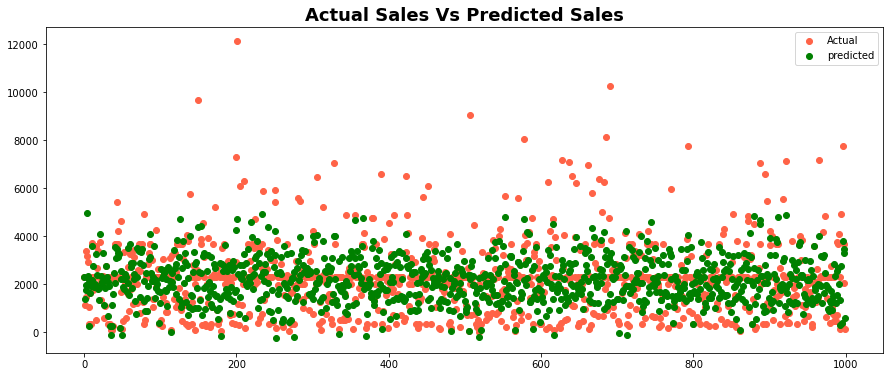

In [44]:
plt.figure(figsize=(15,6)) 
x=np.arange(len(y_test[:1000]))
plt.scatter(x,y_test[:1000],color="tomato",label="Actual")
plt.scatter(x,Y_predict_test_lr[:1000],color="green",label="predicted")
plt.title("Actual Sales Vs Predicted Sales",fontsize=18,fontweight="bold")
plt.legend()
plt.show()

## Modeling Through Decision Tree Regressor --

In [45]:
Decision_tree_model = DecisionTreeRegressor(max_depth=4,min_samples_split=5,max_leaf_nodes=10)
Decision_tree_model.fit(x_train,y_train)               # Create the Decision Tree model and fitted the training data into it 

DecisionTreeRegressor(max_depth=4, max_leaf_nodes=10, min_samples_split=5)

In [46]:
DT_Training_Score=round(Decision_tree_model.score(x_train,y_train)*100,2) 
print("Decision Tree Training Score ", DT_Training_Score,"%") # Finding the training score of the  Decision Tree model

Decision Tree Training Score  53.04 %


In [47]:
DT_Testing_Score=round(Decision_tree_model.score(x_test,y_test)*100,2)      
print("Decision Tree Test Score ", DT_Testing_Score,"%")      # Finding the testing score of the  Decision Tree model

Decision Tree Test Score  49.77 %


In [48]:
Y_predict_DT=Decision_tree_model.predict(x_test)             
Y_predict_DT                                     # Finding Cofficient intercept and slope of the  Decision Tree model

array([2573.02233015, 1409.97990947, 1972.65782648, ..., 1409.97990947,
       1972.65782648, 2573.02233015])

In [49]:
MSE2=mean_squared_error(y_test,Y_predict_DT)                          # Calciulate the Mean Square Error
MAE2=mean_absolute_error(y_test,Y_predict_DT)                         # Calculate the Mean Absolute Error
RMSE2=mean_squared_error(y_test,Y_predict_DT, squared=False)          # Calculate the Root Mean Squared Error
print("MSE : ",MSE2)
print("MAE : ",MAE2)
print("RMSE :",RMSE2)

MSE :  1027980.4503628479
MAE :  728.9173640813169
RMSE : 1013.8937076256307


### Ploting The  <font color=brown>  <u>Actual</u> <font color=black> and <font color=green  ><u>Predicted </u> <font color=black>values of the Sales 

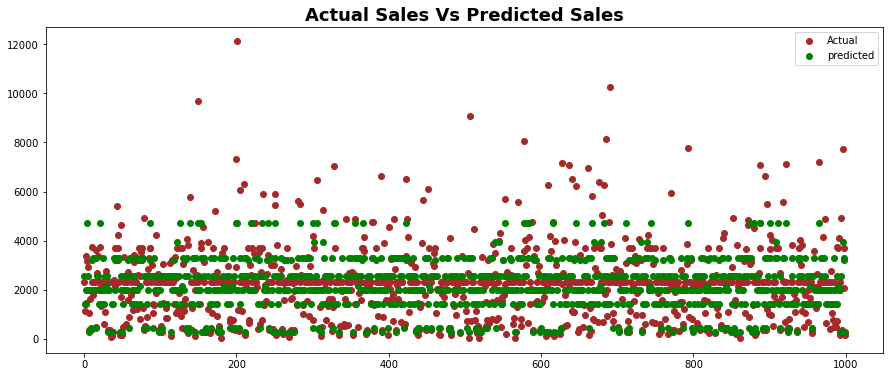

In [50]:
plt.figure(figsize=(15,6))                                               
x=np.arange(len(y_test[:1000]))
plt.scatter(x,y_test[:1000],color="brown",label="Actual")
plt.scatter(x,Y_predict_DT[:1000],color="green",label="predicted")
plt.title("Actual Sales Vs Predicted Sales",fontsize=18,fontweight="bold")
plt.legend()
plt.show()

## Modeling Through Random Forest Regressor --

In [51]:
Random_f_model = RandomForestRegressor(random_state=20, n_jobs=-1, max_depth=10, n_estimators=200,oob_score=True)
Random_f_model.fit(x_train, y_train)                   # Create a Linear model and fitted the training data into it 

RandomForestRegressor(max_depth=10, n_estimators=200, n_jobs=-1, oob_score=True,
                      random_state=20)

In [52]:
Random_f_pred = Random_f_model.predict(x_test)         # Predict the future values of the sales 
print("Prediction:",Random_f_pred )

Prediction: [2735.10398777 1601.71291482 2181.77886012 ... 1475.4388341  2268.35914914
 2536.31700739]


In [53]:
Train_score_RF = round(Random_f_model.score(x_train, y_train)*100,2)
print("Train score:",Train_score_RF,"%")               # Finding the training score of the  Decision Tree model

Train score: 64.25 %


In [54]:
Test_score_RF= round(Random_f_model.score(x_test, y_test)*100,2) 
print("Test score:",Test_score_RF,"%")                 # Finding the testing score of the  Decision Tree model

Test score: 49.87 %


In [55]:
MSE3=mean_squared_error(y_test,Random_f_pred)                         # Calciulate the Mean Square Error
MAE3=mean_absolute_error(y_test,Random_f_pred)                        # Calciulate the Absolute Square Error
RMSE3=mean_squared_error(y_test,Random_f_pred, squared=False)         # Calciulate the Root Mean Square Error
print("MSE : ",MSE3)
print("MAE : ",MAE3)
print("RMSE :",RMSE3)

MSE :  1025937.1698018159
MAE :  720.3538168970201
RMSE : 1012.8855659953971


### Ploting The  <font color=deeppink>  <u> Actual  </u><font color=black> and <font color=purple>  <u>Predicted </u> <font color=black>values of the Sales 

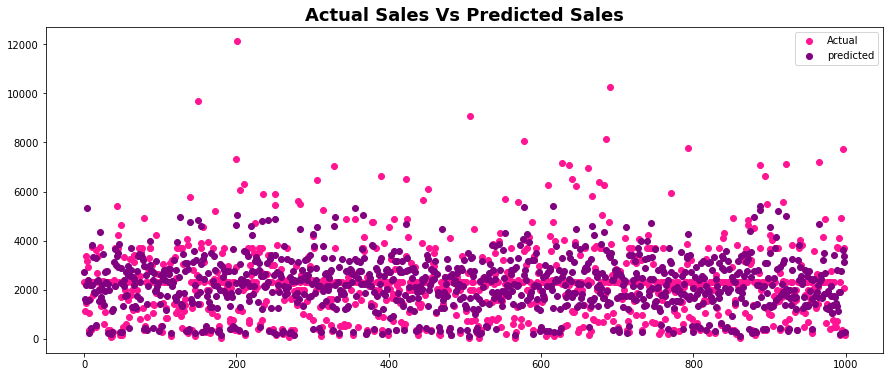

In [56]:
plt.figure(figsize=(15,6))
x=np.arange(len(y_test[:1000]))
plt.scatter(x,y_test[:1000],color="deeppink",label="Actual")
plt.scatter(x,Random_f_pred[:1000],color="purple",label="predicted")
plt.title("Actual Sales Vs Predicted Sales",fontsize=18,fontweight="bold")
plt.legend()
plt.show()

# <font color=indigo>  <center> <u>Final Results

In [57]:
Training_score=[train_score,DT_Training_Score,Train_score_RF]
Testing_score=[test_score,DT_Testing_Score,Test_score_RF]
MSE=[MSE1,MSE2,MSE3]
MAE=[MAE1,MAE2,MAE3]
RMSE=[RMSE1,RMSE2,RMSE3]
INDEX=["LINER MODEL","DECISION TREE","RANDOM FOREST"]
final_df=pd.DataFrame({"Training score":Training_score,"Testing score":Testing_score,"MSE":MSE,"MAE":MAE,"RMSE":RMSE},index=INDEX)
final_df

,Training score,Testing score,MSE,MAE,RMSE
LINER MODEL,43.53,40.07,1.226668e+06,824.773961,1107.550394
DECISION TREE,53.04,49.77,1.027980e+06,728.917364,1013.893708
RANDOM FOREST,64.25,49.87,1.025937e+06,720.353817,1012.885566


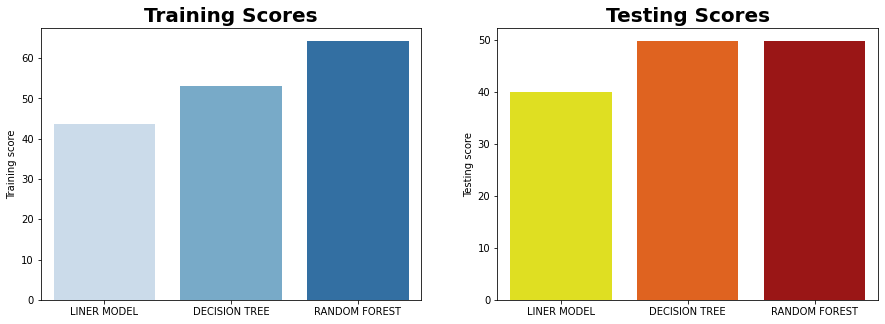

In [58]:
plt.figure(figsize =(15, 5))
plt.subplot(1,2,1)
sb.barplot(final_df.index,final_df["Training score"],palette="Blues")
plt.title("Training Scores",fontsize=20,fontweight="bold")
plt.subplot(1,2,2)
sb.barplot(final_df.index,final_df["Testing score"],palette="hot_r")
plt.title("Testing Scores",fontsize=20,fontweight="bold")
plt.show()

### <font color=dark>INTERPRETATION :
### <font color=magneta > Here after Analysing all the three Models I have to analyse that In Random forest the Training And Testing score is high .

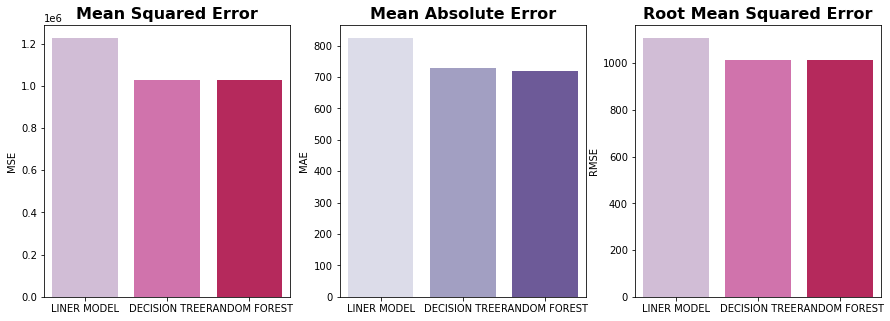

In [59]:
plt.figure(figsize =(15, 5))
plt.subplot(1,3,1)
sb.barplot(final_df.index,final_df["MSE"],palette="PuRd")
plt.title("Mean Squared Error",fontsize=16,fontweight="bold")
plt.subplot(1,3,2)
sb.barplot(final_df.index,final_df["MAE"],palette="Purples")
plt.title("Mean Absolute Error",fontsize=16,fontweight="bold")
plt.subplot(1,3,3)
sb.barplot(final_df.index,final_df["RMSE"],palette="PuRd")
plt.title("Root Mean Squared Error",fontsize=16,fontweight="bold")
plt.show()

### <font color=dark> <u> INTERPRETATION :</u>
### <font color=magneta > Here after Analysing all the three Model Errors I Analysed that In Random forest the MSE, MAE, RMSE is low Compared to Other 2 Models. But eventhough We found that random Forest model is the best model it May not be the ideal Model Because More then 35% Data having Null values .

### <font color=dark> ---------------------------------------------------------------------------------------------------------------------------------------------------------------

### <font color=dark><u>CONCLUSION :
### <font color=magneta > At the end after doing all the operations and preprocessing Feature Engineering, Feature selection, Splitting data, Normalization Different types of model building so we conclude that the best model is Random Forecast Regressor for prediction of the future sales values 

### <font color=dark> ---------------------------------------------------------------------------------------------------------------------------------------------------------------